<a href="https://colab.research.google.com/github/shreyasprabhakar/ANN_Churn/blob/main/CustomerChurnPredictionusingANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [7]:
df['Geography'].value_counts

<bound method IndexOpsMixin.value_counts of 0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object>

In [8]:
df['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: Gender, Length: 10000, dtype: object>

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [16]:
X_train.shape

(8000, 11)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

transformed values


In [18]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

In [49]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
 dense_3 (Dense)             (None, 11)                22        
                                                                 
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
 dense_6 (Dense)             (None, 11)                2

model compilation

In [51]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history = model.fit(X_train_scaled,y_train,epochs=500,verbose=1,validation_split=0.2)

Epoch 1/500
200/200 [==============================] - 1s 4ms/step - loss: 0.3216 - accuracy: 0.8659 - val_loss: 0.3497 - val_accuracy: 0.8631
Epoch 2/500
200/200 [==============================] - 1s 4ms/step - loss: 0.3235 - accuracy: 0.8639 - val_loss: 0.3477 - val_accuracy: 0.8637
Epoch 3/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3212 - accuracy: 0.8667 - val_loss: 0.3475 - val_accuracy: 0.8581
Epoch 4/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3210 - accuracy: 0.8659 - val_loss: 0.3474 - val_accuracy: 0.8562
Epoch 5/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8656 - val_loss: 0.3473 - val_accuracy: 0.8619
Epoch 6/500
200/200 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8680 - val_loss: 0.3468 - val_accuracy: 0.8619
Epoch 7/500
200/200 [==============================] - 1s 4ms/step - loss: 0.3212 - accuracy: 0.8678 - val_loss: 0.3503 - val_accuracy: 0.8581

In [60]:
model.layers[0].get_weights()

[array([[-1.29011236e-02,  1.09574802e-01, -5.50806001e-02,
          1.67965367e-01, -1.81060672e-01, -3.07401326e-02,
          1.65599763e-01,  7.48340115e-02,  2.05253586e-01,
         -3.89062583e-01,  1.73983499e-01],
        [ 1.64332211e+00, -2.03981256e+00, -1.91505924e-01,
          3.22107852e-01,  1.91591168e-03, -5.84684968e-01,
          2.05021471e-01, -6.87090755e-01, -1.34248245e+00,
          3.41986746e-01, -1.06258774e+00],
        [ 5.75057387e-01,  2.59362549e-01, -2.21289769e-01,
          6.02652915e-02, -4.41551387e-01,  6.55260831e-02,
          5.96825242e-01, -2.40500402e-02,  5.65689541e-02,
         -7.40841210e-01, -2.96326280e-01],
        [ 9.96014550e-02,  1.75462469e-01,  2.84990811e+00,
          7.89627898e-03,  2.31214762e+00,  5.94826102e-01,
          5.00938475e-01, -3.79844159e-01, -3.23384285e-01,
          4.34778154e-01, -6.70132458e-01],
        [-8.61049771e-01, -3.56134236e-01,  1.56678247e+00,
         -5.47057152e-01,  6.96854472e-01, -

In [61]:
model.layers[1].get_weights()

[array([[-1.3941021e-01, -5.9248976e-02, -6.9660121e-01, -6.6676117e-02,
         -1.2155727e+00, -2.8133434e-01, -7.9924577e-01, -5.6508118e-01,
         -6.9678599e-01,  9.4863957e-01, -1.2225943e+00],
        [ 4.5377865e-01, -1.4529326e+00,  1.2910280e+00,  6.6867656e-01,
          4.1789892e-01, -7.0943099e-01,  6.7309171e-01,  6.8129051e-01,
          4.0222487e-01, -8.8963306e-01,  6.3217230e-02],
        [-9.0589988e-01,  1.2356482e+00, -2.8222996e-01, -7.0707631e-01,
         -1.0391456e-01,  1.5135173e-01, -4.7629547e-01, -4.4724491e-01,
         -8.4425390e-01,  7.8045201e-01, -1.2384346e+00],
        [-7.7211130e-01, -1.3825828e+00,  3.0343466e-02,  7.9358065e-01,
          5.8855677e-01, -1.5075450e+00,  9.7743726e-01,  1.0554616e+00,
          2.1481140e-01, -5.9379816e-01, -7.6223500e-02],
        [ 8.2525654e+00,  2.4976924e-01,  1.4703758e-01, -2.5979078e-01,
          2.7639666e-01,  7.4124271e-01, -2.3551081e-01,  6.9501027e-03,
          1.2431660e-02,  1.5983491e-0

In [62]:
y_log = model.predict(X_test_scaled)


63/63 [==============================] - 0s 1ms/step


In [63]:
y_pred = np.where(y_log>0.5,1,0)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8645

In [65]:
import matplotlib.pyplot as plt


In [67]:
history.history

{'loss': [0.32157275080680847,
  0.3234926164150238,
  0.3212188482284546,
  0.3210281431674957,
  0.32080593705177307,
  0.32071197032928467,
  0.32115545868873596,
  0.32098284363746643,
  0.3236868679523468,
  0.3212350904941559,
  0.32152053713798523,
  0.3209816813468933,
  0.3200294077396393,
  0.3204747438430786,
  0.32088515162467957,
  0.32259273529052734,
  0.32145369052886963,
  0.3211473226547241,
  0.32085591554641724,
  0.3220769166946411,
  0.32119420170783997,
  0.3224374055862427,
  0.3219856917858124,
  0.3213406801223755,
  0.3223745822906494,
  0.32025498151779175,
  0.3201465904712677,
  0.3210706412792206,
  0.3208211064338684,
  0.3226427137851715,
  0.3197004795074463,
  0.32071059942245483,
  0.32102763652801514,
  0.3204949200153351,
  0.31964391469955444,
  0.32051408290863037,
  0.3226543068885803,
  0.3196371793746948,
  0.32125037908554077,
  0.32022935152053833,
  0.31922537088394165,
  0.32068005204200745,
  0.3210347890853882,
  0.32110950350761414,
  0

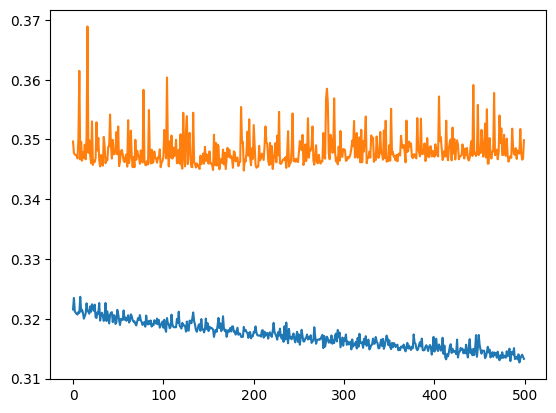

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

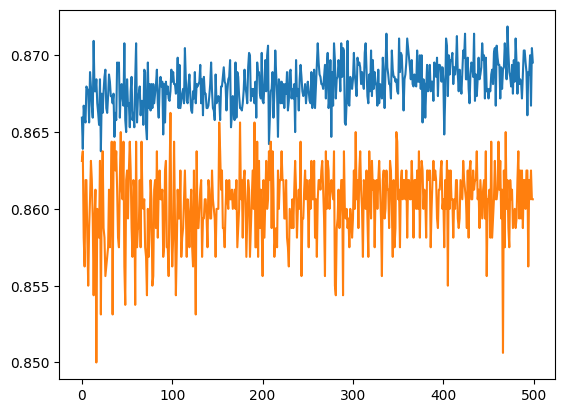

In [70]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])